In [48]:
import numpy as np
from IPython.display import Image
import branca.colormap as cm
import pandas as pd
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import seaborn as sns
import matplotlib.pyplot as pl
from sklearn.preprocessing import LabelEncoder
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score,recall_score, precision_score
from sklearn.metrics import average_precision_score, roc_auc_score, roc_curve, auc
import matplotlib
import imblearn
import folium
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [49]:
import warnings

warnings.filterwarnings('ignore')

In [50]:
datapsd = pd.read_excel('/content/Telco_customer_churn.xlsx')

In [51]:
datapsd.isnull().sum()

,0
CustomerID,0
Count,0
Country,0
State,0
City,0
Zip Code,0
Lat Long,0
Latitude,0
Longitude,0
Gender,0


In [52]:
kucing = ['CustomerID','Count','Country','State','City','Zip Code','Lat Long','Latitude','Longitude','Churn Value','Churn Score','CLTV','Churn Reason']
data = datapsd.drop(kucing,axis=1)

Ternyata ada kesalahan pada data yaitu Total_Charges menjadi kategorik sehingga perlu dibersihkan terlebih dahulu

In [53]:
data['Total Charges'] = pd.to_numeric(data['Total Charges'], errors='coerce')

In [54]:
data.isnull().sum()

,0
Gender,0
Senior Citizen,0
Partner,0
Dependents,0
Tenure Months,0
Phone Service,0
Multiple Lines,0
Internet Service,0
Online Security,0
Online Backup,0


Mengatasi Total Charges yang Missing value

In [55]:
#Mengatasi Total Charges yang Missing value
data['calc_charges'] = data['Monthly Charges'] * data['Tenure Months']
data['diff_in_charges'] = data['Total Charges'] - data['calc_charges']

In [56]:
#Input Missing Value
data['Total Charges'] = np.where(data['Total Charges'].isna() == True,data['calc_charges'], data['Total Charges'])

In [57]:
#drop untuk mengeluarkan column yang tidak berguna
data = data.drop(['calc_charges','diff_in_charges'], axis=1)

# Preparing Data For The Model

In [58]:
data['Churn Label'].replace(to_replace='Yes', value=1, inplace=True)
data['Churn Label'].replace(to_replace='No',  value=0, inplace=True)

In [59]:
data[['Monthly Charges', 'Total Charges']].corr()

,Monthly Charges,Total Charges
Monthly Charges,1.000000,0.651174
Total Charges,0.651174,1.000000


Ternyata ada Imbalance data

In [60]:
data.groupby('Churn Label')['Churn Label'].count()

,Churn Label
Churn Label,
0,5174
1,1869


In [61]:
over = SMOTE(sampling_strategy = 1)

X = data.drop("Churn Label", axis = 1)
y = data['Churn Label']

In [62]:
X

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,No,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40
7039,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7040,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7041,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45


In [63]:
# import category encoders

from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()


X['Gender'] = encoder.fit_transform(X['Gender'])
X['Senior Citizen'] = encoder.fit_transform(X['Senior Citizen'])
X['Partner'] = encoder.fit_transform(X['Partner'])
X['Dependents'] = encoder.fit_transform(X['Dependents'])
X['Phone Service'] = encoder.fit_transform(X['Phone Service'])
X['Multiple Lines'] = encoder.fit_transform(X['Multiple Lines'])
X['Internet Service'] = encoder.fit_transform(X['Internet Service'])
X['Online Security'] = encoder.fit_transform(X['Online Security'] )
X['Online Backup'] = encoder.fit_transform(X['Online Backup'])
X['Device Protection'] = encoder.fit_transform(X['Device Protection'])
X['Tech Support'] = encoder.fit_transform(X['Tech Support'])
X['Streaming TV'] = encoder.fit_transform(X['Streaming TV'])
X['Streaming Movies'] = encoder.fit_transform(X['Streaming Movies'])
X['Contract'] = encoder.fit_transform(X['Contract'])
X['Paperless Billing'] = encoder.fit_transform(X['Paperless Billing'])
X['Payment Method'] = encoder.fit_transform(X['Payment Method'])

In [64]:
X,y = over.fit_resample(X,y)

# EDA

In [65]:
fig = px.bar(datapsd.groupby(['Payment Method',
                                                'Churn Label'])['CustomerID'].count().reset_index(),
             x="CustomerID",
             y="Payment Method",
             color="Churn Label",
             text = 'CustomerID'
            )
fig.show()

In [66]:
fig = px.bar(datapsd.groupby(['Churn Reason'])['CustomerID'].count().reset_index().sort_values('CustomerID',
                                                                                    ascending=False),
             x='Churn Reason',
             y='CustomerID',
             color = 'CustomerID',
             text = 'CustomerID')
fig.show()

In [67]:
fig = px.pie(datapsd.groupby('Churn Label')['CustomerID'].nunique().reset_index(),
             values='CustomerID',
             names='Churn Label')
fig.show()

In [68]:
fig = px.histogram(datapsd, x="Tenure Months", color="Churn Label")
fig.show()

In [69]:
fig = px.pie(datapsd.groupby(['Contract','Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
            names='Contract',
            facet_col = 'Churn Label',
            title = 'Churn rate by contract type')

fig.show()

In [70]:
fig = px.histogram(data, x="Total Charges", color="Churn Label")
fig.show()

In [71]:
fig = px.histogram(datapsd, x="Monthly Charges", color="Churn Label")
fig.show()

In [72]:
fig = px.pie(datapsd.groupby(['Tech Support','Churn Label'])['CustomerID'].count().reset_index(),
             values='CustomerID',
             facet_col = 'Churn Label',
             hole = .5,
             names='Tech Support',
            title = 'Tech support option and churn')
fig.show()

In [73]:
# import category encoders

from sklearn import preprocessing

encoder = preprocessing.LabelEncoder()

cd = data

cd['Gender'] = encoder.fit_transform(cd['Gender'])
cd['Senior Citizen'] = encoder.fit_transform(cd['Senior Citizen'])
cd['Partner'] = encoder.fit_transform(cd['Partner'])
cd['Dependents'] = encoder.fit_transform(cd['Dependents'])
cd['Phone Service'] = encoder.fit_transform(cd['Phone Service'])
cd['Multiple Lines'] = encoder.fit_transform(cd['Multiple Lines'])
cd['Internet Service'] = encoder.fit_transform(cd['Internet Service'])
cd['Online Security'] = encoder.fit_transform(cd['Online Security'] )
cd['Online Backup'] = encoder.fit_transform(cd['Online Backup'])
cd['Device Protection'] = encoder.fit_transform(cd['Device Protection'])
cd['Tech Support'] = encoder.fit_transform(cd['Tech Support'])
cd['Streaming TV'] = encoder.fit_transform(cd['Streaming TV'])
cd['Streaming Movies'] = encoder.fit_transform(cd['Streaming Movies'])
cd['Contract'] = encoder.fit_transform(cd['Contract'])
cd['Paperless Billing'] = encoder.fit_transform(cd['Paperless Billing'])
cd['Payment Method'] = encoder.fit_transform(cd['Payment Method'])

In [74]:
fig = px.bar(cd.corr()['Churn Label'].sort_values(ascending = False),
             color = 'value')
fig.show()

# Modelling

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [77]:
def model(method, X_train, y_train, X_test, y_test):
    # Train the model
    method.fit(X_train, y_train)

    # Make predictions on test data and calculate confusion matrix
    predictions = method.predict(X_test)
    c_matrix = confusion_matrix(y_test, predictions)

    # Calculate label percentages and create label strings with counts and percentages
    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)

    # Plot confusion matrix with labeled counts and percentages
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues')

    # Evaluate model performance and print results
    print("ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_test, predictions)))
    print("Model accuracy: ", '{:.2%}'.format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))

Menggunakan Random Forest

In [78]:
# Mencari Features yang berpengaruh dengan random forest model
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
clf.fit(X_train, y_train)

y_pred_100 = clf.predict(X_test)



# Check accuracy score

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.8471


In [79]:
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
Total Charges,0.135876
Monthly Charges,0.134641
Contract,0.130148
Tenure Months,0.114297
Online Security,0.085954
Tech Support,0.073507
Dependents,0.061740
Payment Method,0.040154
Online Backup,0.033219
Device Protection,0.031895


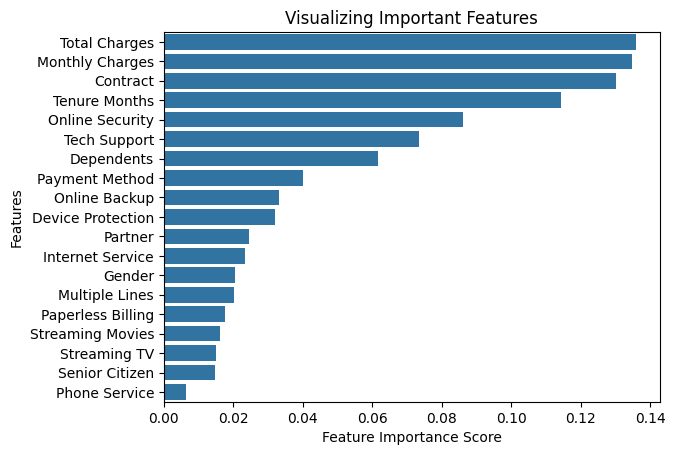

In [80]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

pl.xlabel('Feature Importance Score')

pl.ylabel('Features')



# Add title to the graph
pl.title("Visualizing Important Features")



# Visualize the graph

pl.show()

In [81]:
Xi = X.drop(['Online Backup','Device Protection','Internet Service','Partner','Gender','Multiple Lines','Paperless Billing','Streaming TV','Streaming Movies','Senior Citizen','Phone Service'], axis=1)
yi = y

In [82]:
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size = 0.33, random_state = 42)

In [83]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(n_estimators=120,random_state=0)

# fit the model to the training set

clf.fit(Xi_train, yi_train)


# Predict on the test set results

y_pred = clf.predict(Xi_test)



# Check accuracy score

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(yi_test, y_pred)))

Model accuracy score with doors variable removed : 0.8407


In [84]:
clf = RandomForestClassifier(n_estimators=120,random_state=0)

ROC AUC:  84.06%
Model accuracy:  84.07%
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1700
           1       0.83      0.86      0.84      1715

    accuracy                           0.84      3415
   macro avg       0.84      0.84      0.84      3415
weighted avg       0.84      0.84      0.84      3415



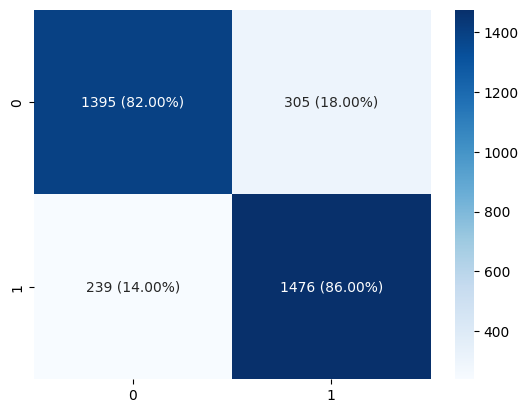

In [85]:
model(clf,Xi_train,yi_train,Xi_test,yi_test)